In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
df = pd.read_csv("C:/Users/rotte/Downloads/archive/SampleSuperstore.csv")
df 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


*****DATA CLEANING*****

In [6]:
df.drop(['Country', 'Postal Code'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

## data set after droping country and postal code columns ##

In [7]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [8]:
print("Shape:", df.shape)

Shape: (9944, 11)


In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [10]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Ship Mode        object
Segment          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [11]:
print("\nSummary Stats:\n", df.describe())


Summary Stats:
               Sales     Quantity     Discount       Profit
count   9944.000000  9944.000000  9944.000000  9944.000000
mean     230.752150     3.794047     0.156440    28.770873
std      624.644765     2.228752     0.206584   234.841370
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.340000     2.000000     0.000000     1.724800
50%       55.000000     3.000000     0.200000     8.679950
75%      210.104000     5.000000     0.200000    29.534700
max    22638.480000    14.000000     0.800000  8399.976000


# EDA #

# Total sales and profit #

In [12]:
print("\nTotal Sales: $", round(df['Sales'].sum(), 2))


Total Sales: $ 2294599.38


In [13]:
print("Total Profit: $", round(df['Profit'].sum(), 2))

Total Profit: $ 286097.56


# Sales by Category #

In [24]:
sales_cat = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_cat

Category
Technology         835774.6410
Furniture          740568.6663
Office Supplies    718256.0700
Name: Sales, dtype: float64

In [25]:
profit_subcat = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
profit_subcat

Sub-Category
Copiers        55617.8249
Phones         44493.0524
Accessories    41920.9052
Paper          33830.0381
Binders        30205.2603
Chairs         26567.1278
Storage        21287.1788
Appliances     18138.0054
Furnishings    13042.0534
Envelopes       6964.1767
Art             6511.8388
Labels          5499.1558
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3398.7542
Tables        -17725.4811
Name: Profit, dtype: float64

In [26]:
sales_region = df.groupby('Region')['Sales'].sum()
sales_region 

Region
Central    500724.2708
East       677843.9080
South      391721.9050
West       724309.2935
Name: Sales, dtype: float64

In [27]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_cities

City
New York City    255841.1050
Los Angeles      175296.8170
Seattle          119460.2820
San Francisco    112184.8130
Philadelphia     108948.1090
Houston           64422.7704
Chicago           48500.8090
San Diego         47502.1290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64

In [28]:
discount_profit_corr = df[['Discount', 'Profit']].corr().iloc[0, 1]
discount_profit_corr

np.float64(-0.2199389824976497)

# Visualizations #

In [30]:
plt.figure(figsize=(16, 15))
plt.suptitle("Superstore Data Visualizations", fontsize=18)

Text(0.5, 0.98, 'Superstore Data Visualizations')

<Figure size 1600x1500 with 0 Axes>

# Sales by Category #

Text(0.5, 1.0, 'Sales by Category')

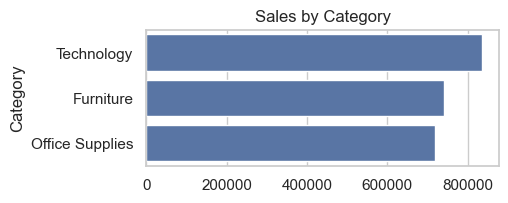

In [31]:
plt.subplot(3, 2, 1)
sns.barplot(x=sales_cat.values, y=sales_cat.index)
plt.title("Sales by Category")

# Profit by Sub-Category #

Text(0.5, 1.0, 'Profit by Sub-Category')

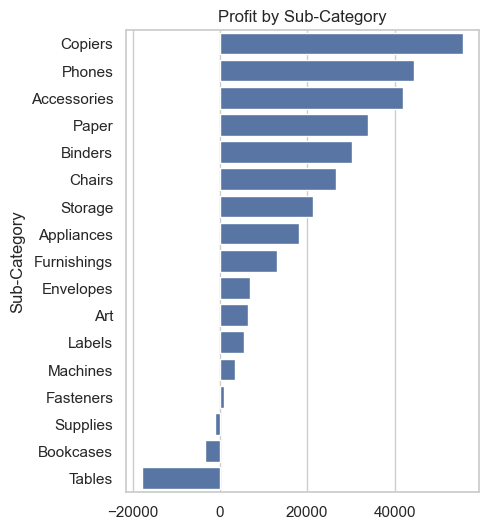

In [38]:
plt.subplot(1, 2, 2)
sns.barplot(x=profit_subcat.values, y=profit_subcat.index)
plt.title("Profit by Sub-Category")

# Sales by Region #

Text(0, 0.5, 'Sales')

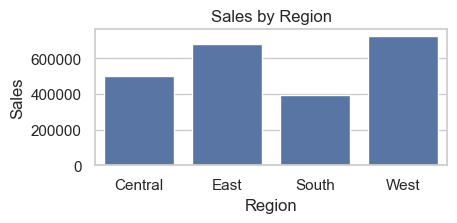

In [39]:
plt.subplot(3, 2, 3)
sns.barplot(x=sales_region.index, y=sales_region.values)
plt.title("Sales by Region")
plt.ylabel("Sales")

# Top 10 Cities by Sales #

<Axes: >

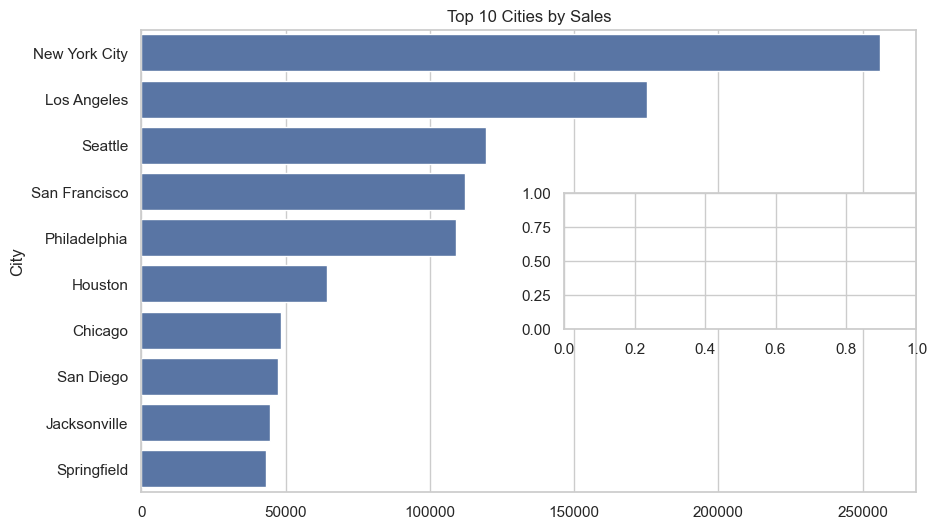

In [41]:
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Sales")
plt.subplot(3, 2, 4)

# Discount vs Profit #

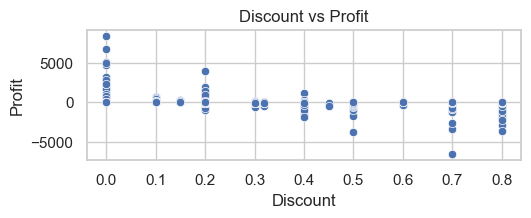

In [62]:
plt.subplot(3,2,5)
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation #

In [63]:
print("\nCorrelation between Discount and Profit:", round(discount_profit_corr, 2))


Correlation between Discount and Profit: -0.22


# Summary #

Highest Sales: Found in the Technology category.

Most Profitable Sub-Categories: Copiers, Phones, Accessories.

Regions: West and East have higher sales than others.

Discount Impact: High discounts correlate negatively with profit.

City Focus: Targeting top cities can increase revenue.